In [211]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

data1=pdr.get_data_yahoo('CIPLA.NS',start='2017-04-03',end='2023-06-05')



[*********************100%***********************]  1 of 1 completed


In [214]:
data1=data1.reset_index()
data1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-03,595.299988,595.299988,590.099976,592.650024,576.793213,758083
1,2017-04-05,600.000000,603.900024,590.450012,593.049988,577.182434,1926049
2,2017-04-06,591.500000,593.650024,587.049988,590.299988,574.506042,1436914
3,2017-04-07,590.349976,593.450012,585.150024,590.000000,574.214050,1958876
4,2017-04-10,591.000000,594.200012,588.250000,589.650024,573.873413,1177737
...,...,...,...,...,...,...,...
1427,2023-01-09,1081.750000,1096.949951,1076.900024,1087.449951,1087.449951,893437
1428,2023-01-10,1086.500000,1090.250000,1074.849976,1078.699951,1078.699951,594426
1429,2023-01-11,1078.699951,1083.949951,1043.000000,1047.599976,1047.599976,2168577
1430,2023-01-12,1052.800049,1064.099976,1043.150024,1061.150024,1061.150024,1188988


In [240]:
data1.tail(20)

,Open,High,Low,Close,Volume
1412,1090.349976,1100.500000,1084.449951,1096.650024,779326
1413,1096.000000,1097.400024,1088.449951,1091.150024,795748
1414,1096.099976,1130.000000,1085.650024,1128.000000,3224730
1415,1135.000000,1147.349976,1117.050049,1122.449951,2070809
1416,1121.000000,1146.949951,1113.199951,1119.150024,2773210
1417,1127.000000,1135.000000,1094.000000,1096.500000,1279529
1418,1094.050049,1104.900024,1090.099976,1095.849976,1209316
1419,1094.000000,1103.150024,1084.099976,1085.800049,872940
1420,1086.000000,1098.000000,1070.000000,1087.550049,1625961
1421,1094.949951,1095.000000,1073.500000,1075.949951,1185711


In [215]:
data1=data1.drop(['Date','Adj Close'],axis=1)

In [216]:
import pandas as pd
data=pd.DataFrame(data1["Close"][0:1419]) # here we take first 1419 values (2017 - 2022 dec end)
validation_data=pd.DataFrame(data1['Close'][1419:]) # here we are taking next 7 values of the dataset(2023 start - 12 days)

In [217]:
import pandas as pd
data_training=pd.DataFrame(data["Close"][0:int(len(data)*0.80)])
data_test=pd.DataFrame(data['Close'][int(len(data)*0.80):int(len(data))])

In [218]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [219]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.35560454],
       [0.35625712],
       [0.35177025],
       ...,
       [0.8626204 ],
       [0.87771259],
       [0.87453097]])

In [220]:
data_training_array.shape

(1135, 1)

In [221]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
        x_train.append(data_training_array[i-100:i])
        y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [222]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [223]:
model=Sequential()
model.add(LSTM(units=40,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,activation='relu'))
model.add(Dropout(0.3))




model.add(Dense(units=25))
model.add(Dense(units=1))

In [224]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100, 40)           6720      
                                                                 
 dropout_14 (Dropout)        (None, 100, 40)           0         
                                                                 
 lstm_15 (LSTM)              (None, 50)                18200     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 25)                1275      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 26,221
Trainable params: 26,221
Non-trai

In [225]:
model.compile( optimizer='adam',loss='mean_squared_error')

In [226]:

model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
26/26 [==============================] - 5s 78ms/step - loss: 0.0431 - val_loss: 0.1007
Epoch 2/100
26/26 [==============================] - 2s 64ms/step - loss: 0.0104 - val_loss: 0.0238
Epoch 3/100
26/26 [==============================] - 2s 63ms/step - loss: 0.0055 - val_loss: 0.0367
Epoch 4/100
26/26 [==============================] - 2s 63ms/step - loss: 0.0039 - val_loss: 0.0314
Epoch 5/100
26/26 [==============================] - 2s 62ms/step - loss: 0.0036 - val_loss: 0.0312
Epoch 6/100
26/26 [==============================] - 2s 66ms/step - loss: 0.0032 - val_loss: 0.0061
Epoch 7/100
26/26 [==============================] - 2s 64ms/step - loss: 0.0031 - val_loss: 0.0050
Epoch 8/100
26/26 [==============================] - 2s 68ms/step - loss: 0.0030 - val_loss: 0.0072
Epoch 9/100
26/26 [==============================] - 2s 65ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 10/100
26/26 [==============================] - 2s 68ms/step - loss: 0.0026 - val_loss: 0.0027

In [227]:
model.save('LSTM.h5')

In [228]:
past_100_days=data_training.tail(100)
final_df=past_100_days.append(data_test,ignore_index=True)

C:\Users\chakr\AppData\Local\Temp\ipykernel_9628\60233251.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_test,ignore_index=True)


In [229]:
input_data=scaler.fit_transform(final_df)

In [230]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
        x_test.append(input_data[i-100:i])
        y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)

In [231]:
y_predicted=model.predict(x_test)

9/9 [==============================] - 0s 21ms/step


In [232]:
scale_factor=1/0.00319285
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

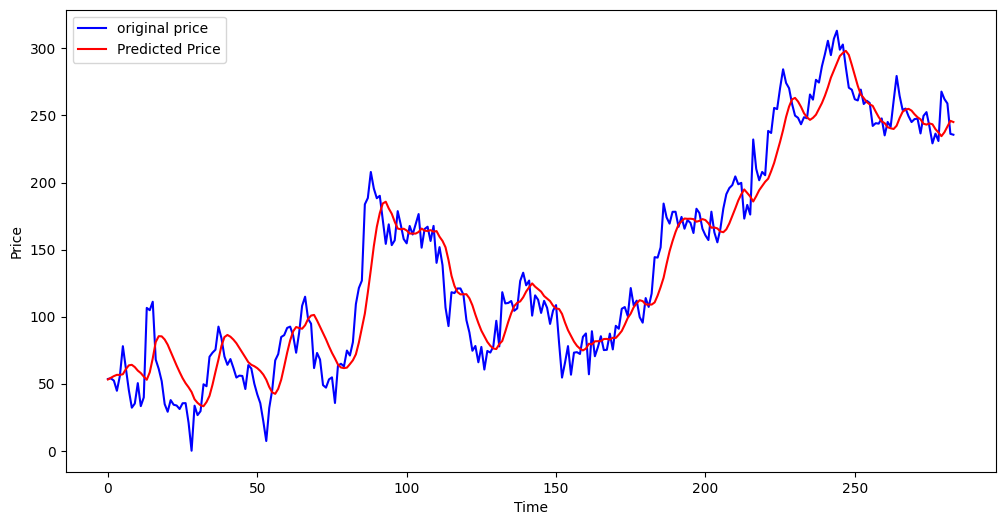

In [233]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [234]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

  
# calculate MAE
error1 = mae(y_test, y_predicted)
error2=mse(y_test,y_predicted)
error3=np.sqrt(error2)

  
# display
print("Mean absolute error : " + str(error1))
print("Root Mean squared error : " + str(error3))

Mean absolute error : 16.800633561237593
Root Mean squared error : 21.786448999586383


In [241]:
last_7_days=validation_data.head(7).values

import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

last_7_days_scaled=scaler.fit_transform(last_7_days)
list1=[]
pred_list=[]
list1.append(last_7_days_scaled)
for i in range(6):
  list1=np.array(list1)
  list1=np.reshape(list1,(list1.shape[0],list1.shape[1],1))
  pred_price=model.predict(list1)
  
  #
  list1=np.reshape(1,1)
  list1=list(list1)
  list1.append(pred_price)
  
  pred_price=scaler.inverse_transform(pred_price)
  pred_price=pred_price.flatten()

  pred_list.append(pred_price[0])
  list1.pop(0)
  print(pred_price)

1/1 [==============================] - 0s 25ms/step
[1076.3201]
1/1 [==============================] - 0s 22ms/step
[1072.9802]
1/1 [==============================] - 0s 23ms/step
[1072.5614]
1/1 [==============================] - 0s 22ms/step
[1072.4622]
1/1 [==============================] - 0s 20ms/step
[1072.4374]
1/1 [==============================] - 0s 22ms/step
[1072.4313]


In [242]:
pred_list

[1076.3201, 1072.9802, 1072.5614, 1072.4622, 1072.4374, 1072.4313]

In [243]:
import pandas as pd
  

valid = {'ACtual': data1["Close"][1426:],
        'Validation': pred_list}
  
# Create DataFrame
valid1 = pd.DataFrame(valid)
  
# Print the output.
valid1

,ACtual,Validation
1426,1076.349976,1076.320068
1427,1087.449951,1072.980225
1428,1078.699951,1072.561401
1429,1047.599976,1072.462158
1430,1061.150024,1072.437378
1431,1067.750000,1072.431274


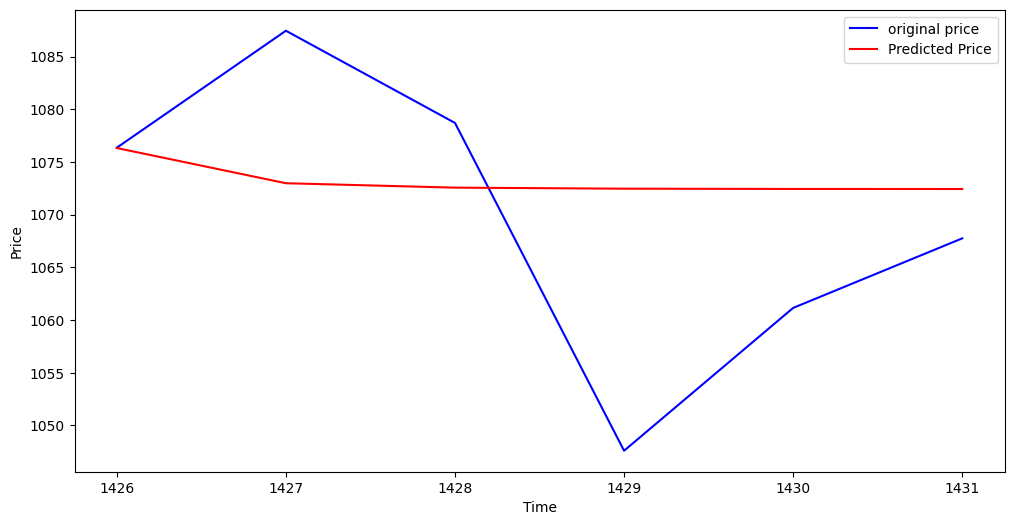

In [244]:
plt.figure(figsize=(12,6))
plt.plot(valid1["ACtual"],'b',label='original price')
plt.plot(valid1["Validation"],'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [239]:
'''inputs =validation_data.values
inputs = scaler.fit_transform(inputs)


X_test=[]



for i in range(7,inputs.shape[0]):
        X_test.append(inputs[i-7:i])

X_test=np.array(X_test)


predicted_cases = model.predict(X_test)

predicted_cases = scaler.inverse_transform(predicted_cases)'''



'inputs =validation_data.values\ninputs = scaler.fit_transform(inputs)\n\n\nX_test=[]\n\n\n\nfor i in range(7,inputs.shape[0]):\n        X_test.append(inputs[i-7:i])\n\nX_test=np.array(X_test)\n\n\npredicted_cases = model.predict(X_test)\n\npredicted_cases = scaler.inverse_transform(predicted_cases)'